# Airline Stock Analysis - Comparing 20 Airline Stocks With 10+ Fundamental Financial Ratios

### Introduction
    
The below program takes data for 20 major airlines using 11 ratios: Trailing P/E (ttm),	Price to Sales (ttm),	Price to Book (mrq),	Enterprise Value / Revenue,	Enterprise Value / EBITDA,	Debt to Equity (mrq),	Current Ratio (mrq),	Free Cash Flow / Capex (ttm),	Operating Margin (ttm),	Return on Asset (ttm),	Market Cap (intraday). All data collected from yahoo finance on 03/27/2020. 

Making all these ratios viable for comparision requires normalizations. This program generates a scoring system for these ratios that is accurate accross all types of ratio scales by assuming a normal distribution for each set of intracompany ratios. 

### Data Cleaning

Below we import `airline_stock_dataset.csv` which was manually created via excel. It has every ratio on the "x-axis" and every company on the "y-axis". This data was cleaned prior to it's import so their are no missing or mismatched values. Very little cleaning is nessasary here. 

In [88]:
from csv import reader
opened_file = open('airline_stock_dataset.csv')
read_file = reader(opened_file)
stocks_data = list(read_file)
stocks_data_header = stocks_data[0]
stocks_data = (stocks_data[1:])

print(stocks_data_header)
print(stocks_data)

['Company Name', 'Ticker', 'Trailing P/E (ttm)', 'Price to Sales (ttm)', 'Price to Book (mrq)', 'Enterprise Value / Revenue', 'Enterprise Value / EBITDA', 'Debt to Equity (mrq)', 'Current Ratio (mrq)', 'Free Cash Flow / Capex (ttm)', 'Operating Margin (ttm)', 'Return on Asset (ttm)', 'Market Cap (intraday)']
[['Delta Airlines', 'DAL', '4.34', '0.44', '1.32', '0.74', '3.77', '117.17', '0.41', '0.707', '14.15', '6.66', '20.29'], ['United Airlines', 'UAL', '3.07', '0.21', '0.76', '0.56', '3.55', '177.35', '0.55', '0.526', '10.56', '5.62', '8.81'], ['Jetblue Airways', 'JBLU', '5.72', '0.4', '0.63', '0.6', '3.56', '65.68', '0.67', '0.2535', '10.06', '4.45', '3.01'], ['Spirit Airlines', 'SAVE', '3.38', '0.3', '0.5', '0.94', '4.8', '157.34', '1.25', '1.014', '13.55', '5.32', '1.13'], ['Southwest Airlines', 'LUV', '9.66', '0.99', '2.17', '0.95', '4.99', '40.7', '0.67', '2.88', '13.14', '7.07', '21.33'], ['Alaska Air Group', 'ALK', '5.25', '0.46', '0.92', '0.65', '3.78', '74.28', '0.64', '1.474

The data set is converted into a numpy array to make analysis easier. The first 3 rows/lists are printed.

In [89]:
import numpy as np
np_stocks = np.genfromtxt('airline_stock_dataset.csv', dtype=float, delimiter=',', skip_header=1)
np_stocks.reshape(21, 13)
print(np_stocks[:3])

[[     nan      nan   4.34     0.44     1.32     0.74     3.77   117.17
    0.41     0.707   14.15     6.66    20.29  ]
 [     nan      nan   3.07     0.21     0.76     0.56     3.55   177.35
    0.55     0.526   10.56     5.62     8.81  ]
 [     nan      nan   5.72     0.4      0.63     0.6      3.56    65.68
    0.67     0.2535  10.06     4.45     3.01  ]]


Some ratios are considered better when lower (first list of lists below) and some ratios are considered better when higher (second list of lists below). A different function will be used for each of these criteria so they are arranged into separate arrays for ease of use. The first 3 rows (different ratios for a single company) are printed below.

In [90]:
low_ratios = np_stocks[:, 2:8]
high_ratios = np_stocks[:, 8:]
print('P/E, P/S, P/B, EV/R, EV/EBITDA, D/E')
print('Low values are better for these ratios')
print(low_ratios[:3])
print('\n')
print('Current, FCF/CAPEX, Oper Margin, RoA, Mcap')
print('High values are better for these ratios')
print(high_ratios[:3])

P/E, P/S, P/B, EV/R, EV/EBITDA, D/E
Low values are better for these ratios
[[  4.34   0.44   1.32   0.74   3.77 117.17]
 [  3.07   0.21   0.76   0.56   3.55 177.35]
 [  5.72   0.4    0.63   0.6    3.56  65.68]]


Current, FCF/CAPEX, Oper Margin, RoA, Mcap
High values are better for these ratios
[[ 0.41    0.707  14.15    6.66   20.29  ]
 [ 0.55    0.526  10.56    5.62    8.81  ]
 [ 0.67    0.2535 10.06    4.45    3.01  ]]


### Labeling and Graphing Statistical Values

For every column (a single ratio for every company) in both arrays the mean and standard deviation are calculated and assigned to a variable. The full column of each ratio is isolated as well. This data for PE Ratio is printed as an example for what happens for every ratio.

This could be implemented into the z-score function (below) but it is convienenient to have access to the actual variables and the option to refer back while having access to conclusions. 

In [91]:
from numpy import mean, std

In [92]:
pe_ratio = low_ratios[:, 0]
mean_pe = mean(pe_ratio)
std_pe = std(pe_ratio)
print('List of P/E ratios for every company')
print(pe_ratio)
print()
print('Mean of the P/E ratios for every company')
print(mean_pe)
print()
print('Standard Deviation of P/E ratios for every company')
print(std_pe)

### This follows the same steps for every ratio in the low ratios list
### This step could be added to the z_score function but I left it out so these variables are easily viewable. 
### It makes things easier when trying to find outliers and pick out specific company data.

# Isolating all the ratio columns
ps_ratio = low_ratios[:, 1]
pb_ratio = low_ratios[:, 2]
evr_ratio = low_ratios[:, 3]
evebitda_ratio = low_ratios[:, 4]
de_ratio = low_ratios[:, 5]

# Getting the mean of all the ratios
mean_ps = mean(ps_ratio)
mean_pb = mean(pb_ratio)
mean_evr = mean(evr_ratio)
mean_evebitda = mean(evebitda_ratio)
mean_de = mean(de_ratio)

# Getting the stanard deviation of each of the ratios
std_ps = std(ps_ratio)
std_pb = std(pb_ratio)
std_evr = std(evr_ratio)
std_evebitda = std(evebitda_ratio)
std_de = std(de_ratio)

### The same process for assigning values is done for the high ratios list

# Isolating all the ratio columns
current_ratio = high_ratios[:, 0]
fcfcapex_ratio = high_ratios[:, 1]
opermargin_ratio = high_ratios[:, 2]
roa_ratio = high_ratios[:, 3]
mcap = high_ratios[:, 4]

# Getting the mean of all the ratios
mean_current = mean(current_ratio)
mean_fcfcapex = mean(fcfcapex_ratio)
mean_opermargin = mean(opermargin_ratio)
mean_roa = mean(roa_ratio)
mean_mcap = mean(mcap)

# Getting the stanard deviation of each of the ratios
std_current = std(current_ratio)
std_fcfcapex = std(fcfcapex_ratio)
std_opermargin = std(opermargin_ratio)
std_roa = std(roa_ratio)
std_mcap = std(mcap)

List of P/E ratios for every company
[ 4.34  3.07  5.72  3.38  9.66  5.25  9.23  2.68  3.62  3.08  4.51  8.03
 16.56 11.71  6.82  3.84 15.7   3.4   6.55 11.69  8.21]

Mean of the P/E ratios for every company
7.002380952380953

Standard Deviation of P/E ratios for every company
4.029632979579328


Below is the graphical representation of for a select few ratio values. This graph highlights a few problems with the raw data that justifies the methodology for further analysis. 

Each of the ratios when viewed in tandem cannot compare companies because they are all on different scales. These are also only the ratios below 25. Other ratios such as debt to equity ratio usually fall in the hundreds. This is not helpful in comparing companies. It's also a misleading because higher raios are a bad thing but they are more pronounced on the graph. 

The next step generates a normalization function that could score all these ratios in a uniform manner. A graph with this same ratio data in normalized form will follow. 

[]

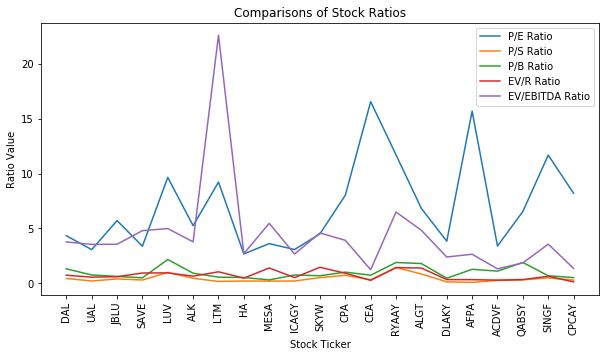

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

company = ['DAL','UAL','JBLU','SAVE','LUV','ALK','LTM','HA','MESA',
        'ICAGY','SKYW','CPA','CEA','RYAAY','ALGT','DLAKY','AFPA',
        'ACDVF','QABSY','SINGF','CPCAY']

fig = plt.figure(figsize=(10,5))
plt.xlabel('Stock Ticker')
plt.ylabel('Ratio Value')
plt.title('Comparisons of Stock Ratios')
plt.xticks(rotation=90)

first = plt.plot(company, pe_ratio, label='P/E Ratio')
second = plt.plot(company, ps_ratio, label='P/S Ratio')
third = plt.plot(company, pb_ratio, label = 'P/B Ratio')
fourth = plt.plot(company, evr_ratio, label = 'EV/R Ratio')
fifth = plt.plot(company, evebitda_ratio, label = 'EV/EBITDA Ratio')

plt.legend()
plt.plot()

### Normalizing Raw Data

The function `pos_z_score`takes in a list of ratios, the ratios mean, and the ratios standard deviation. It outputs a store for each ratio. Every standard devation from the mean is worth "1 point" or "-1 points" depending on whether it is below or above the mean. It is assumed that these ratios follow a normal distribution. Bessels correction factor is assumed to be zero because their is high variance in all of these ratios and their is not many data points, i.e., it is not justifiable to flatten the distribution. 

In [94]:
def pos_z_score(ratio_list, mean, stdev, bessels = 0):
    z_list = []
    for value in ratio_list:
        z = (value - mean) / stdev
        z = -z
        z_list.append(z)
    return z_list

The example for using the `pos_z_score` function is printed for PE Ratio

This is done for every ratio.

In [95]:
print('This is the normalized scoring of P/E Ratio')
print('This same normalization is done with every ratio')
pe_z = pos_z_score(pe_ratio, mean_pe, std_pe)
print(pe_z)

This is the normalized scoring of P/E Ratio
This same normalization is done with every ratio
[0.6607006062023275, 0.9758657853727097, 0.31823765560773903, 0.8989357022681282, -0.6595188844956514, 0.4348735880566206, -0.552809414382845, 1.0726487931494413, 0.839376928251678, 0.9733841697886909, 0.6185131412740087, -0.2550155443005938, -2.3718336374685935, -1.168250079219497, 0.04525994136567558, 0.7847813854032654, -2.1584146972429807, 0.8939724711000907, 0.11226356213418215, -1.163286848051459, -0.29968462481293184]


In [96]:
ps_z = pos_z_score(ps_ratio, mean_ps, std_ps)
pb_z = pos_z_score(pb_ratio, mean_pb, std_pb)
evr_z = pos_z_score(evr_ratio, mean_evr, std_evr)
evebitda_z = pos_z_score(evebitda_ratio, mean_evebitda, std_evebitda)
de_z = pos_z_score(de_ratio, mean_de, std_de)

The same graph as "Comparisons of Stock Ratios" is printed exept the functions are now normalized. 

[]

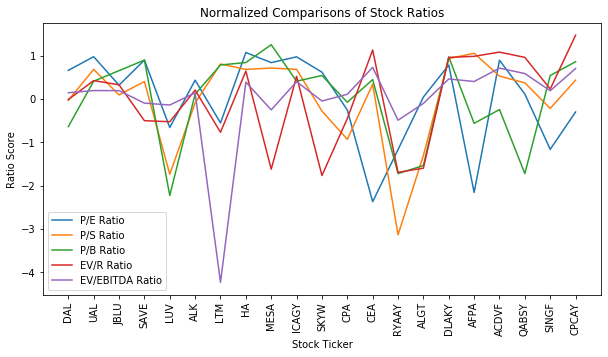

In [97]:
company = ['DAL','UAL','JBLU','SAVE','LUV','ALK','LTM','HA','MESA',
        'ICAGY','SKYW','CPA','CEA','RYAAY','ALGT','DLAKY','AFPA',
        'ACDVF','QABSY','SINGF','CPCAY']

fig = plt.figure(figsize=(10,5))
plt.xlabel('Stock Ticker')
plt.ylabel('Ratio Score')
plt.title('Normalized Comparisons of Stock Ratios')
plt.xticks(rotation=90)

first = plt.plot(company, pe_z, label='P/E Ratio')
second = plt.plot(company, ps_z, label='P/S Ratio')
third = plt.plot(company, pb_z, label = 'P/B Ratio')
fourth = plt.plot(company, evr_z, label = 'EV/R Ratio')
fifth = plt.plot(company, evebitda_z, label = 'EV/EBITDA Ratio')

plt.legend()
plt.plot()

The same steps for normalizing and graphing are done for the second array of ratios. The second array is composed of ratios that are gauged with higher values being considered better. The only difference in the `neg_z_score` funtion is not negating `z` as is done in `pos_z_score`.

In [98]:
def neg_z_score(ratio_list, mean, stdev, bessels = 0):
    z_list = []
    for value in ratio_list:
        z = (value - mean) / stdev
        z_list.append(z)
    return z_list

In [99]:
# Isolating all the ratio columns
current_ratio = high_ratios[:, 0]
fcfcapex_ratio = high_ratios[:, 1]
opermargin_ratio = high_ratios[:, 2]
roa_ratio = high_ratios[:, 3]
mcap = high_ratios[:, 4]

# Getting the mean of all the ratios
mean_current = mean(current_ratio)
mean_fcfcapex = mean(fcfcapex_ratio)
mean_opermargin = mean(opermargin_ratio)
mean_roa = mean(roa_ratio)
mean_mcap = mean(mcap)

# Getting the stanard deviation of each of the ratios
std_current = std(current_ratio)
std_fcfcapex = std(fcfcapex_ratio)
std_opermargin = std(opermargin_ratio)
std_roa = std(roa_ratio)
std_mcap = std(mcap)

In [100]:
current_z = neg_z_score(current_ratio, mean_current, std_current)
fcfcapex_z = neg_z_score(fcfcapex_ratio, mean_fcfcapex, std_fcfcapex)
opermargin_z = neg_z_score(opermargin_ratio, mean_opermargin, std_opermargin)
roa_z = neg_z_score(roa_ratio, mean_roa, std_roa)
mcap_z = neg_z_score(mcap, mean_mcap, std_mcap)

[]

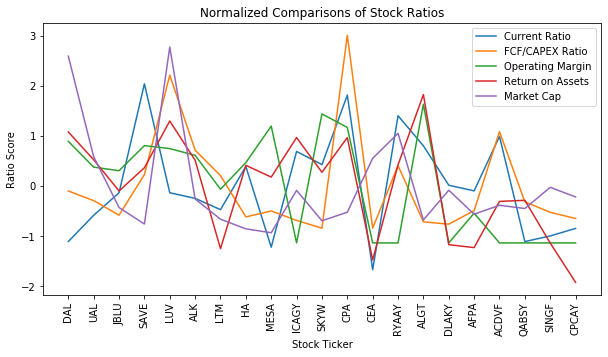

In [101]:
company = ['DAL','UAL','JBLU','SAVE','LUV','ALK','LTM','HA','MESA',
        'ICAGY','SKYW','CPA','CEA','RYAAY','ALGT','DLAKY','AFPA',
        'ACDVF','QABSY','SINGF','CPCAY']

fig = plt.figure(figsize=(10,5))
plt.xlabel('Stock Ticker')
plt.ylabel('Ratio Score')
plt.title('Normalized Comparisons of Stock Ratios')
plt.xticks(rotation=90)

first = plt.plot(company, current_z, label='Current Ratio')
second = plt.plot(company, fcfcapex_z, label='FCF/CAPEX Ratio')
third = plt.plot(company, opermargin_z, label = 'Operating Margin')
fourth = plt.plot(company, roa_z, label = 'Return on Assets')
fifth = plt.plot(company, mcap_z, label = 'Market Cap')

plt.legend()
plt.plot()

### Compiling Useful Results

The above graphs are too cluttered to give a single result thats human readable. The below step is a precasianary measure to ensure that all the data makes sense. 

The next step is a simple vector addition for all the ratio z_scores for each company.

In [102]:
final_scores_lol = [
    [pe_z],
    [ps_z],
    [pb_z],
    [evr_z],
    [evebitda_z],
    [de_z],
    [current_z],
    [fcfcapex_z],
    [opermargin_z],
    [roa_z],
    [mcap_z]
]
final_scores_array = np.array(final_scores_lol)

print('Here are some values that should allow us to see any numbers. Numbers above or below' 
      'five would not make sense because its highly unlikely to have a value deviate' 
      'from the mean by 5 standard dveiation. There is none of these outliars in max' 
      'and min values. The mean is also near zero which tells us the function is working properly')
print()
print('Maximum Value')
print(print(final_scores_array.max()))
print()
print('Minimum Value')
print(print(final_scores_array.min()))
print()
print('Dataset Average')
print(mean(final_scores_lol))

added_scores_list = []
for row in final_scores_array:
    n = 0
    a_ratio = row[n]
    if n <= 20:
        summed_score = sum(a_ratio)
        added_scores_list.append(summed_score)
        n += 1
print()
print('Dataset average for every ratio (row)')
print(added_scores_list)

Here are some values that should allow us to see any numbers. Numbers above or belowfive would not make sense because its highly unlikely to have a value deviatefrom the mean by 5 standard dveiation. There is none of these outliars in maxand min values. The mean is also near zero which tells us the function is working properly

Maximum Value
3.013676809680323
None

Minimum Value
-4.233520565684954
None

Dataset Average
-7.689856447620132e-18

Dataset average for every ratio (row)
[4.496403249731884e-15, -2.7755575615628914e-16, 1.9984014443252818e-15, 2.4424906541753444e-15, 3.3306690738754696e-16, -6.342149028171207e-15, 2.3314683517128287e-15, -4.107825191113079e-15, -1.3322676295501878e-15, -2.220446049250313e-15, 1.5543122344752192e-15]


Creating two lists: company tickers and final added scores, which are than graphed as final results. 

In [103]:
final_scores_array = final_scores_array.reshape(11, 21)
print(company)
print()

summed_scores_list = [
    sum(final_scores_array[:, 0]),
    sum(final_scores_array[:, 1]), 
    sum(final_scores_array[:, 2]), 
    sum(final_scores_array[:, 3]),
    sum(final_scores_array[:, 4]),
    sum(final_scores_array[:, 5]),
    sum(final_scores_array[:, 6]),
    sum(final_scores_array[:, 7]),
    sum(final_scores_array[:, 8]),
    sum(final_scores_array[:, 9]),
    sum(final_scores_array[:, 10]),
    sum(final_scores_array[:, 11]),
    sum(final_scores_array[:, 12]),
    sum(final_scores_array[:, 13]),
    sum(final_scores_array[:, 14]),
    sum(final_scores_array[:, 15]),
    sum(final_scores_array[:, 16]),
    sum(final_scores_array[:, 17]),
    sum(final_scores_array[:, 18]),
    sum(final_scores_array[:, 19]),
    sum(final_scores_array[:, 20])
                     ]
print(summed_scores_list)

['DAL', 'UAL', 'JBLU', 'SAVE', 'LUV', 'ALK', 'LTM', 'HA', 'MESA', 'ICAGY', 'SKYW', 'CPA', 'CEA', 'RYAAY', 'ALGT', 'DLAKY', 'AFPA', 'ACDVF', 'QABSY', 'SINGF', 'CPCAY']

[3.96727742789011, 3.2034305247761186, 1.6342607177940174, 4.381595223714061, 2.8401605861451586, 3.043422838114311, -7.7990747950196875, 3.8329287102011076, -0.8045686270028196, 2.335847923380502, -0.19619411287299815, 5.779074653542669, -4.831548062027067, -5.109078139534316, -1.5902899392993544, 1.6492388067789086, -6.345814745139317, 2.8064206211371516, -3.9540612609944494, -3.3605575932561402, -1.4824707583279688]


In [104]:
stocks_and_ratings = [company, summed_scores_list]
final_scores_array.reshape(21, 11)
print(stocks_and_ratings[0])
stocks_and_ratings[1]

['DAL', 'UAL', 'JBLU', 'SAVE', 'LUV', 'ALK', 'LTM', 'HA', 'MESA', 'ICAGY', 'SKYW', 'CPA', 'CEA', 'RYAAY', 'ALGT', 'DLAKY', 'AFPA', 'ACDVF', 'QABSY', 'SINGF', 'CPCAY']


[3.96727742789011,
 3.2034305247761186,
 1.6342607177940174,
 4.381595223714061,
 2.8401605861451586,
 3.043422838114311,
 -7.7990747950196875,
 3.8329287102011076,
 -0.8045686270028196,
 2.335847923380502,
 -0.19619411287299815,
 5.779074653542669,
 -4.831548062027067,
 -5.109078139534316,
 -1.5902899392993544,
 1.6492388067789086,
 -6.345814745139317,
 2.8064206211371516,
 -3.9540612609944494,
 -3.3605575932561402,
 -1.4824707583279688]

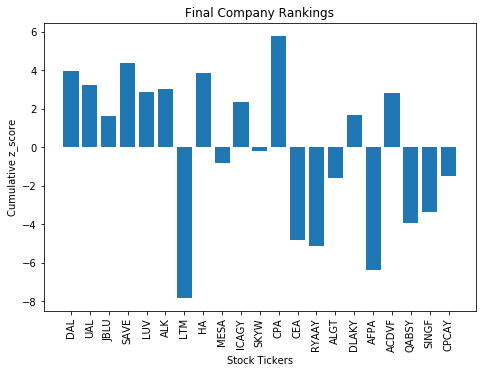

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure()



ax = fig.add_axes([0,0,1,1])
ax.bar(company,stocks_and_ratings[1])
plt.xticks(rotation=90)
plt.title('Final Company Rankings')
plt.xlabel('Stock Tickers')
plt.ylabel('Cumulative z_score')

plt.show()


# Results

The above graph provides a ranking of the fundamental strength of stocks based their financial ratios. A score of 1 would mean one financial ratio for a single company was one standard deviation above the average for it's peers. A score of -1 would occurr for a ratio falling to one standard deviation below the mean of it's counterparts while all others remained average. Each value in the above graph is a cumulative score taken as the sum of 11 ratios. Top five are as follows:

    1. Copa Holdings
    2. Spirit Airlines
    3. Delta Airlines
    4. Hawaiian Holdings
    5. United Airlines Holdings
    
This analysis created a system to score stocks in the same industry based on the difference in their respective financial ratios when compared to each other. Program logic can be revised to accomadate a dataset of ratios for any group of companies in any single industry. 